## Amostragem e remoção de ruído

In [132]:
from scipy.signal import freqz
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy import signal
from scipy.interpolate import interp1d
from scipy import interpolate

$Problema:$Considere um sinal $x(t)$ senoidal, que ao ser transmitido é contaminado por um ruído AWGN.Faça  a filtragem desse sinal de modo a recuperar $x(t)$ fazendo uso de um filtro digital, ao final recupere $x(t)$ na forma contínua.

$Solução:$ Considera-se $x(t)$ como sendo:
$$  x(t) = sen(2\pi 10 t)  $$

Ao ser transmitido $x(t)$ é contaminado por $n(t)$, então:
$$ y(t)= x(t)+ n(t)  $$



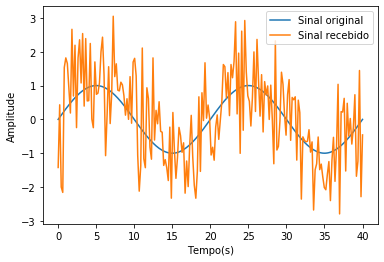

In [363]:
t = np.linspace(0, 40, 200)
x = np.sin(2*np.pi*10*t)  
y = x+np.random.normal(0, 1, 200)
plt.plot(t,x,label='Sinal original')
plt.plot(t,y,label='Sinal recebido') 
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.legend()

$y(t)$ então é o sinal recebido, para fazer uso de ténicas de filtragem digital é preciso realizar a amostragem desse sinal:

 $$ y(n)  =\sum y(nT) \delta(n-T)$$

In [366]:
def amostragem(x,T):     
    xams = []
    for i in range(0,len(x)):
        if(i%T==0):
            xams.append(x[i])             
    return xams   

In [367]:
yams = amostragem(y,4)

Text(0, 0.5, 'Amplitude')

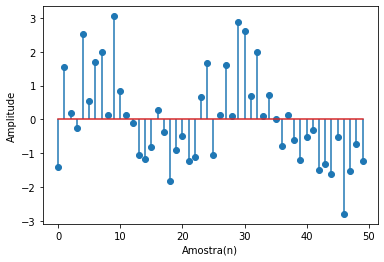

In [368]:
plt.stem(yams,use_line_collection=True)
plt.xlabel('Amostra(n)')
plt.ylabel('Amplitude')  

O passo seguinte consiste em passar o sinal $y(n)$ por um filtro para que o ruído seja removido, sendo $h\left ( n \right )$ sua resposta ao inpulso
$$ \widetilde{y}\left ( n \right ) = y\left ( n \right )*h\left ( n \right )  $$


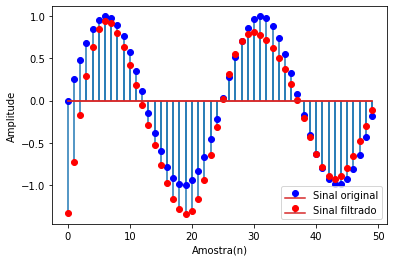

In [365]:
N =15  # ordem do filtro
Wn = 0.19
B, A = signal.butter(N, Wn, output='ba')
yf = signal.filtfilt(B,A,yams)
plt.stem(amostragem(x,4),use_line_collection=True, markerfmt='bo',label='Sinal original')
plt.stem(yf,use_line_collection=True, markerfmt='ro',label='Sinal filtrado')
plt.xlabel('Amostra(n)')
plt.ylabel('Amplitude')   
plt.legend() 

In [360]:
def polozero(B,A):
    from  matplotlib import patches
    plt.figure(figsize=(6,4))
    ax = plt.subplot(111)
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(uc)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xlabel('Re', horizontalalignment='right', x=1.0)
    plt.ylabel('Im',  y=1.0)
    plt.title('Complex z-Plane', loc='right')
    plt.grid()
    plt.plot(np.real(A),np.imag(A),'rx')
    plt.plot(np.real(B),np.imag(B),'bo')

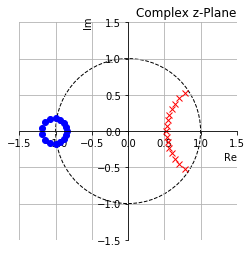

In [361]:
polozero(np.roots(B),np.roots(A))

Por fim, utiliza-se de uma interpolação numérica para transformar $ \widetilde{y}\left ( n \right )$ em um sinal contínuo $ \widetilde{x}\left ( n \right )$. A solução minimiza o erro quadrático é
 $$E  =  \sum_{i=0}^{N} \left | p \left ( x_i \right )- y_i \right |^{2}  $$ 

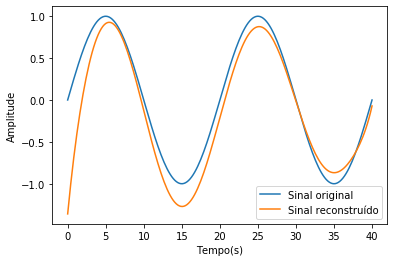

In [348]:
samples = np.linspace(0,max(t),len(yf))
polv = np.polyfit(samples,yf,9)  #  
yrec = np.polyval(polv,t)
plt.plot(t,x,label='Sinal original')
plt.plot(t,yrec,label='Sinal reconstruído')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.legend()

Utiliza-se o MSE como métrica de avaliação do processo:
$$ MSE =   \frac{1}{N}\sum_{i=0}^{N} \left (\breve{y}_i-y_i \right )^{2}$$

In [373]:
from sklearn.metrics import mean_squared_error
print('O MSE vale-',mean_squared_error(x, yrec))

O MSE vale- 0.07353099362897612
